In [2]:
import sys
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Import functions
from src.data_cleaning import load_and_clean_data
from src.eda_analysis import (
    profile_data, calculate_loss_ratio, analyze_vehicle_claims,
    perform_anova, plot_eda_visualizations
)

# Set plot style
plt.style.use('seaborn-v0_8')

# Define data path

data_path = '../data/MachineLearningRating_v3.txt'
cleaned_data_path = '../data/cleaned_data.csv'  # New: Output path for cleaned data

Load and Clean Data

In [3]:
try:
    df = load_and_clean_data(data_path, delimiter='|')
    # Save cleaned data to CSV
    df.to_csv(cleaned_data_path, index=False)
    print(f"Cleaned data saved to: {cleaned_data_path}")
except FileNotFoundError:
    print("Please ensure the dataset is at '../data/MachineLearningRating_v3.txt'")
except pd.errors.ParserError:
    print("Failed to parse the text file. Please confirm the delimiter.")
except ValueError as e:
    print(f"Data loading failed: {str(e)}")
except Exception as e:
    print(f"Error loading or saving data: {str(e)}")

c:\Users\Senayit\Documents\1\week3\acis_project_week3\venv\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Cleaned data saved to: ../data/cleaned_data.csv


Profile Data

In [4]:
try:
    numerical_stats, data_types, missing_values = profile_data(df)
    print("=== Data Profiling ===")
    print("\nNumerical Statistics:\n", numerical_stats)
    print("\nData Types:\n", data_types)
    print("\nMissing Values:\n", missing_values)
except NameError:
    print("DataFrame 'df' not defined. Please ensure data loading succeeded.")
except Exception as e:
    print(f"Error profiling data: {str(e)}")

=== Data Profiling ===

Numerical Statistics:
        UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  1.000098e+06   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.488056e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360059e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear     Cylinders  cubiccapacity     kilowatts  \
count      1.000098e+06  1.000098e+06   1.000098e+06  1.000098e+06   
mean       2.010225e+03  4.046616e+00   2.466869e+03  9.721553e+01   
std        3.261391e+00  2.939410e-01   4.427106e+02  1.939061e+01   
min        1.987000e+03 

Preprocess Data

In [5]:
try:
    # Calculate Loss Ratio
    df = calculate_loss_ratio(df)

    # Analyze Vehicle Claims
    top_claims, bottom_claims = analyze_vehicle_claims(df)
    print("\n=== Vehicle Claims Analysis ===")
    print(f"Top 5 Makes by Claims:\n{top_claims}")
    print(f"Bottom 5 Makes by Claims:\n{bottom_claims}")

    # Perform ANOVA
    anova_result = perform_anova(df, 'Province')
    print("\n=== Statistical Tests ===")
    print(anova_result)
except NameError:
    print("DataFrame 'df' not defined. Please ensure data loading succeeded.")
except Exception as e:
    print(f"Error preprocessing data: {str(e)}")

c:\Users\Senayit\Documents\1\week3\acis_project_week3\src\eda_analysis.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  claims_by_make = df.groupby('make')['TotalClaims'].sum().sort_values(ascending=False)



=== Vehicle Claims Analysis ===
Top 5 Makes by Claims:
make
TOYOTA            5.230279e+07
MERCEDES-BENZ     2.938695e+06
VOLKSWAGEN        1.839180e+06
CMC               1.323616e+06
GOLDEN JOURNEY    1.246583e+06
Name: TotalClaims, dtype: float64
Bottom 5 Makes by Claims:
make
FORD                                   0.0
DAIHATSU                               0.0
CITROEN                                0.0
CHERY                                  0.0
VOLVO                                  0.0
Name: TotalClaims, dtype: float64


c:\Users\Senayit\Documents\1\week3\acis_project_week3\src\eda_analysis.py:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.dropna(subset=[target_col]).groupby(group_col)



=== Statistical Tests ===
ANOVA for LossRatio by Province: F=4.23, p=0.0000


Visualizations

c:\Users\Senayit\Documents\1\week3\acis_project_week3\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


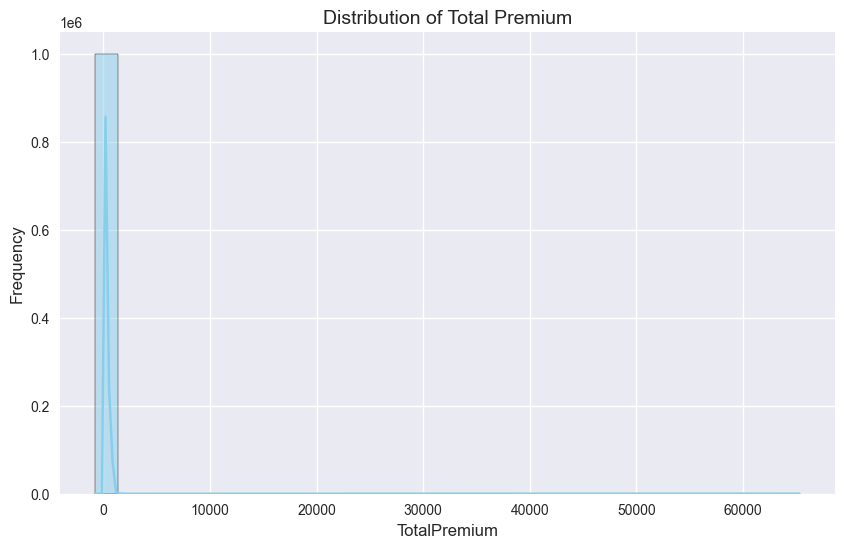

c:\Users\Senayit\Documents\1\week3\acis_project_week3\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


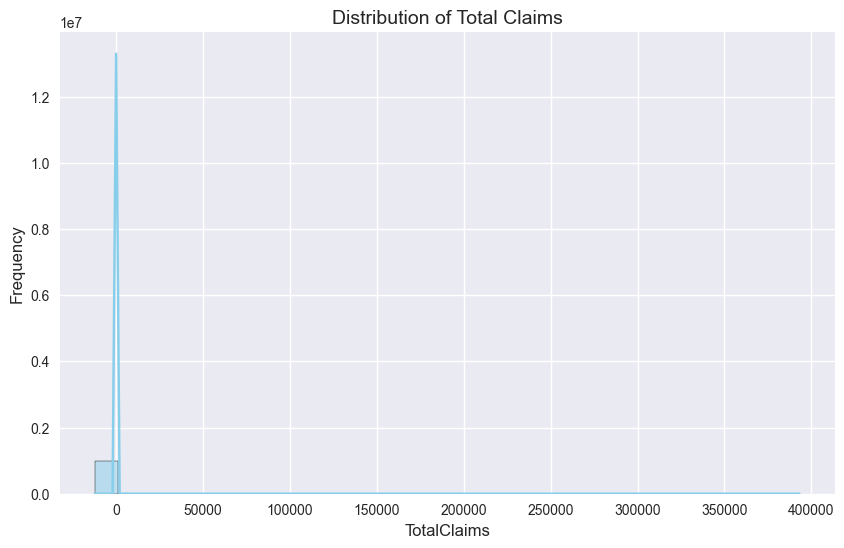

c:\Users\Senayit\Documents\1\week3\acis_project_week3\venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


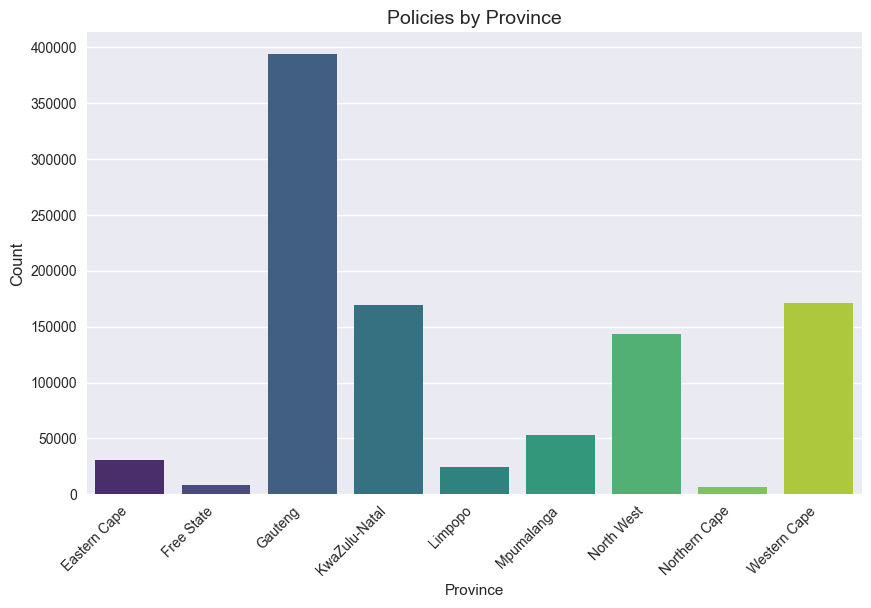

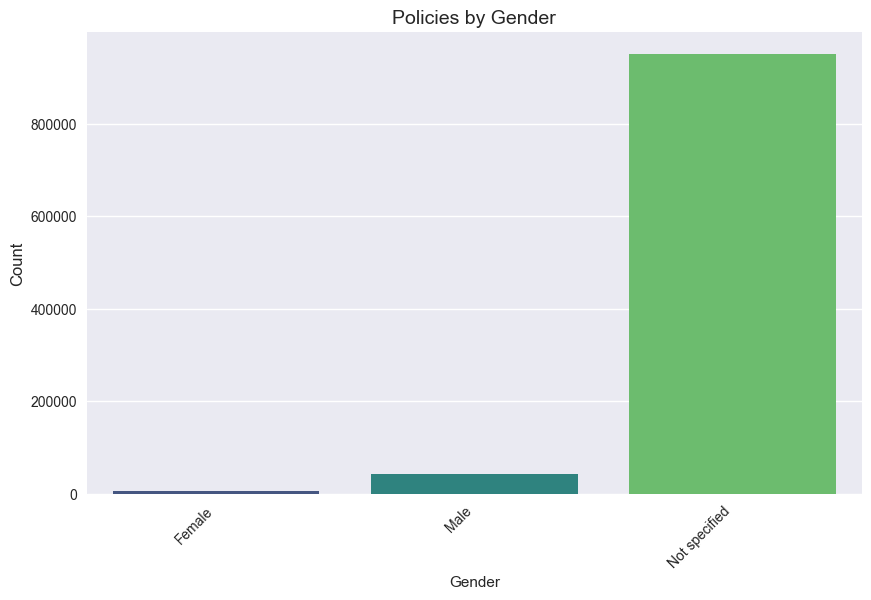

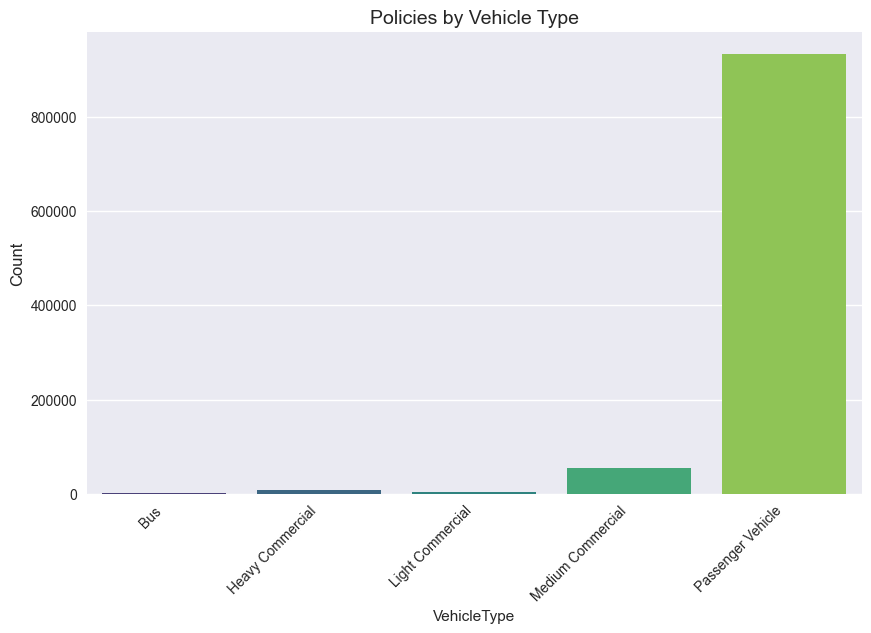

c:\Users\Senayit\Documents\1\week3\acis_project_week3\src\eda_analysis.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_by_group = df.groupby(col)['LossRatio'].mean().sort_values()
c:\Users\Senayit\Documents\1\week3\acis_project_week3\venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


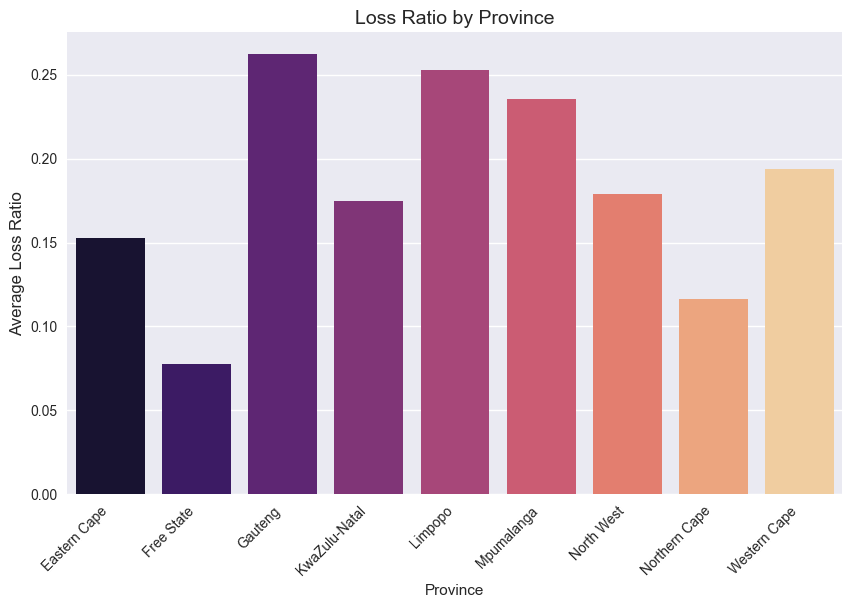

c:\Users\Senayit\Documents\1\week3\acis_project_week3\src\eda_analysis.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_by_group = df.groupby(col)['LossRatio'].mean().sort_values()
c:\Users\Senayit\Documents\1\week3\acis_project_week3\venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


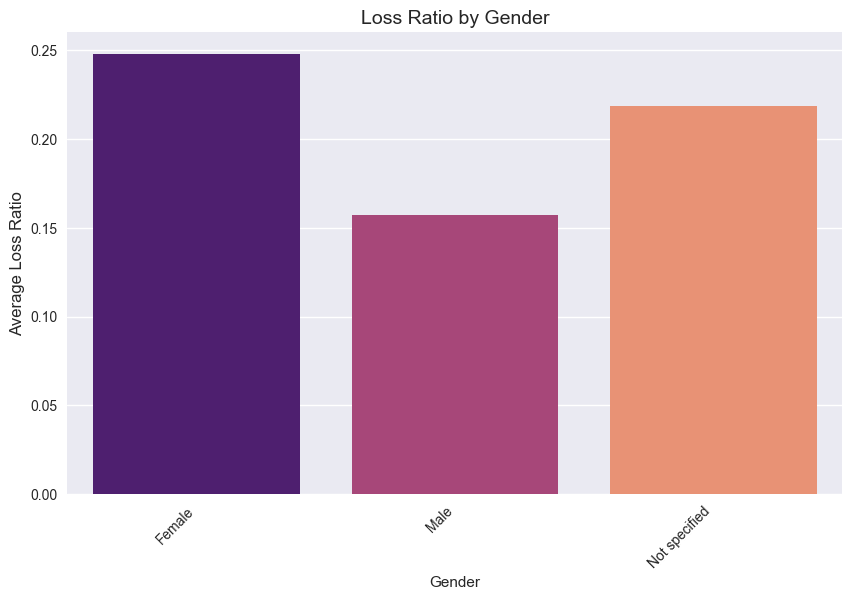

c:\Users\Senayit\Documents\1\week3\acis_project_week3\src\eda_analysis.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_by_group = df.groupby(col)['LossRatio'].mean().sort_values()
c:\Users\Senayit\Documents\1\week3\acis_project_week3\venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


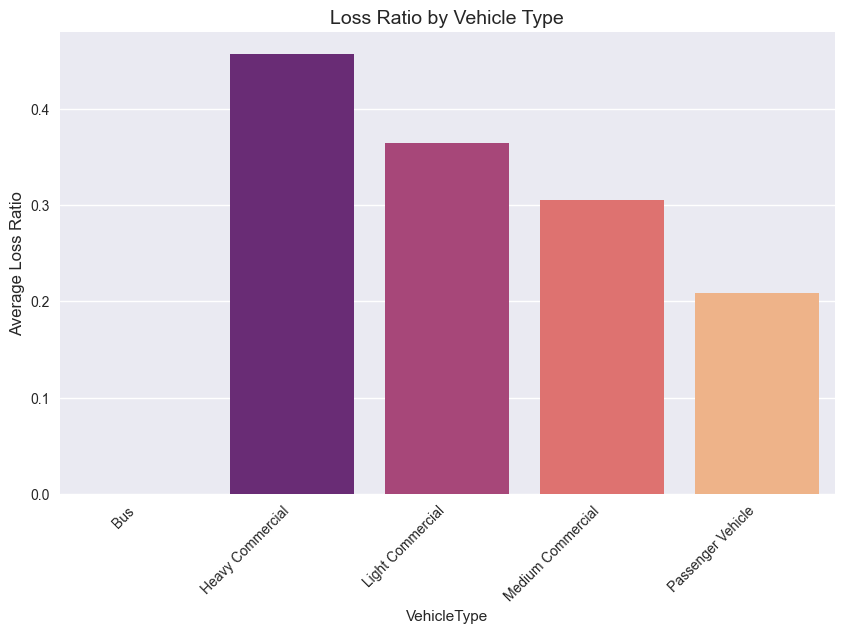

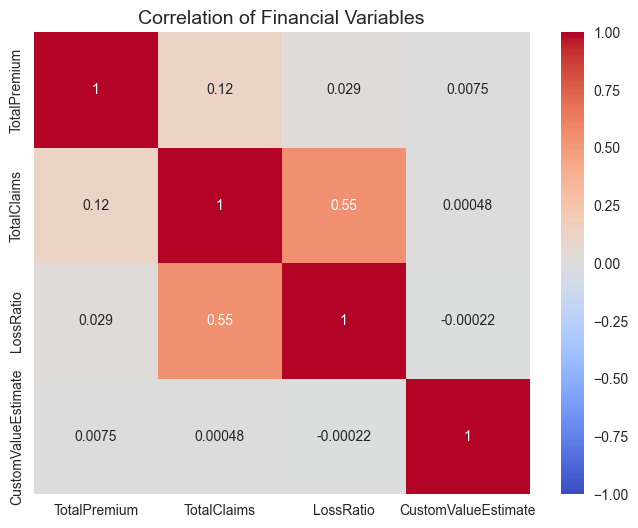

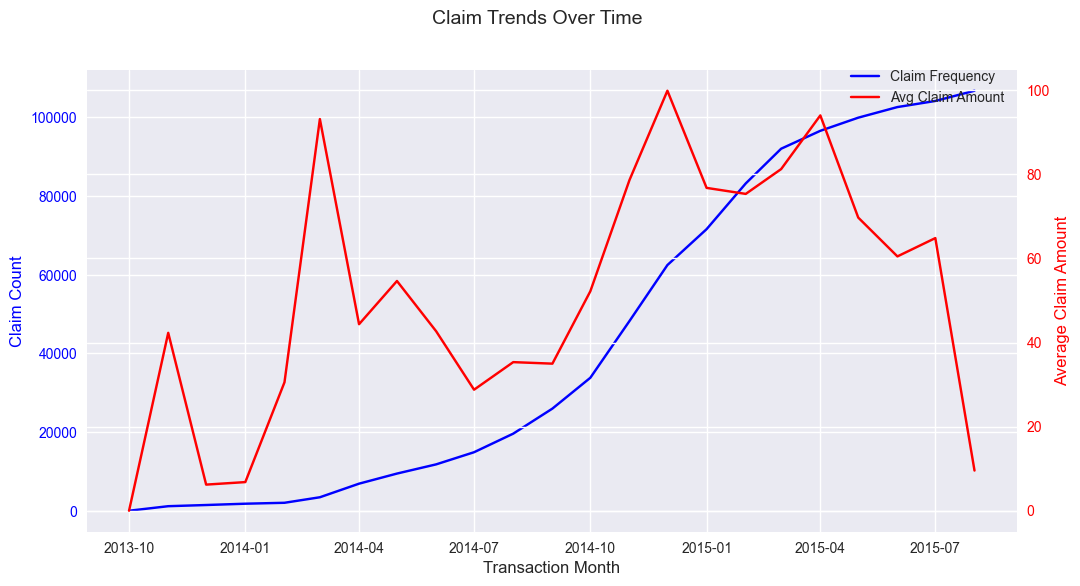

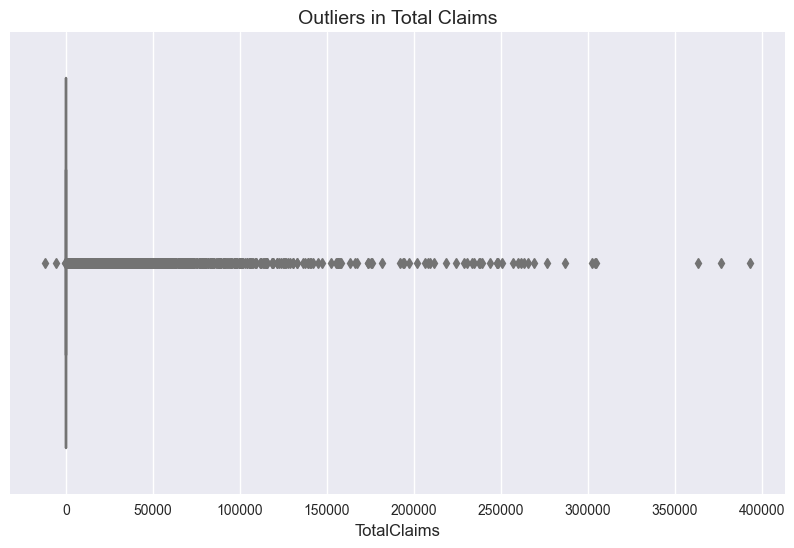

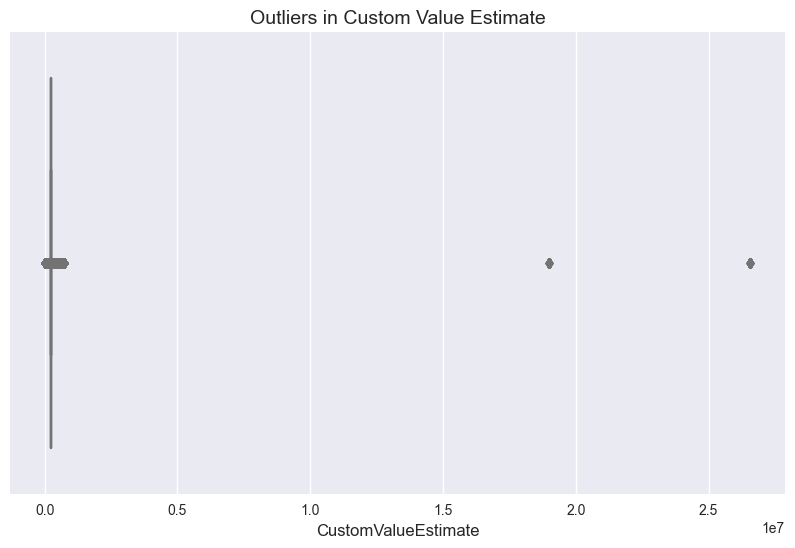

c:\Users\Senayit\Documents\1\week3\acis_project_week3\venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


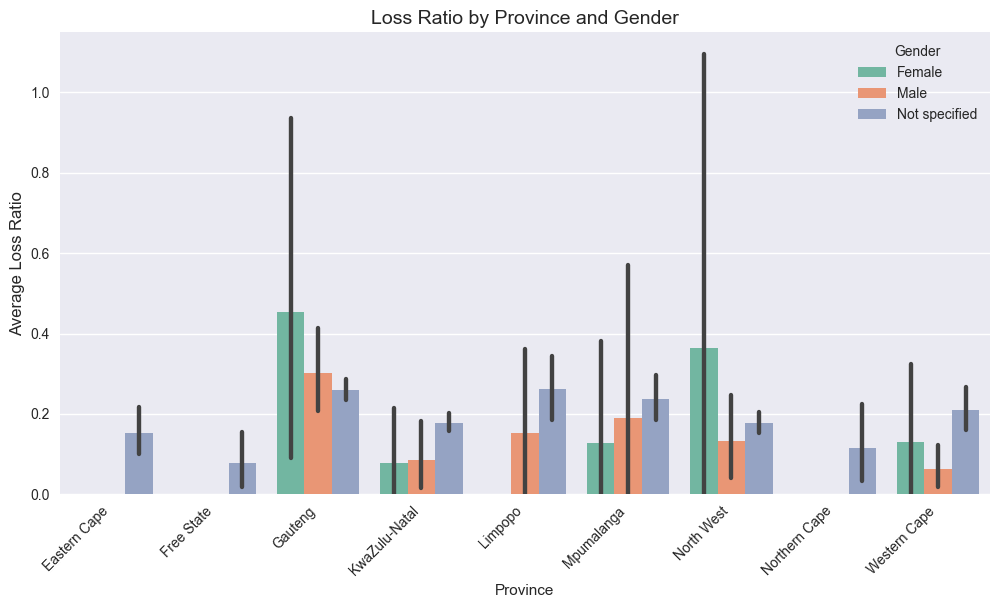

c:\Users\Senayit\Documents\1\week3\acis_project_week3\venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Senayit\Documents\1\week3\acis_project_week3\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


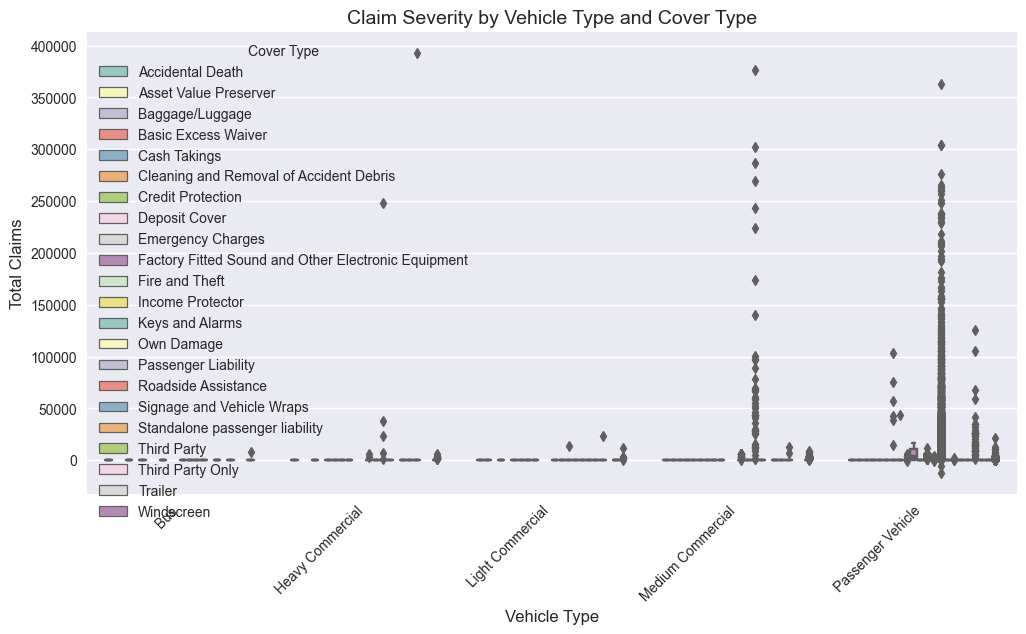

c:\Users\Senayit\Documents\1\week3\acis_project_week3\src\eda_analysis.py:198: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  claims_by_month_province = pd.pivot_table(


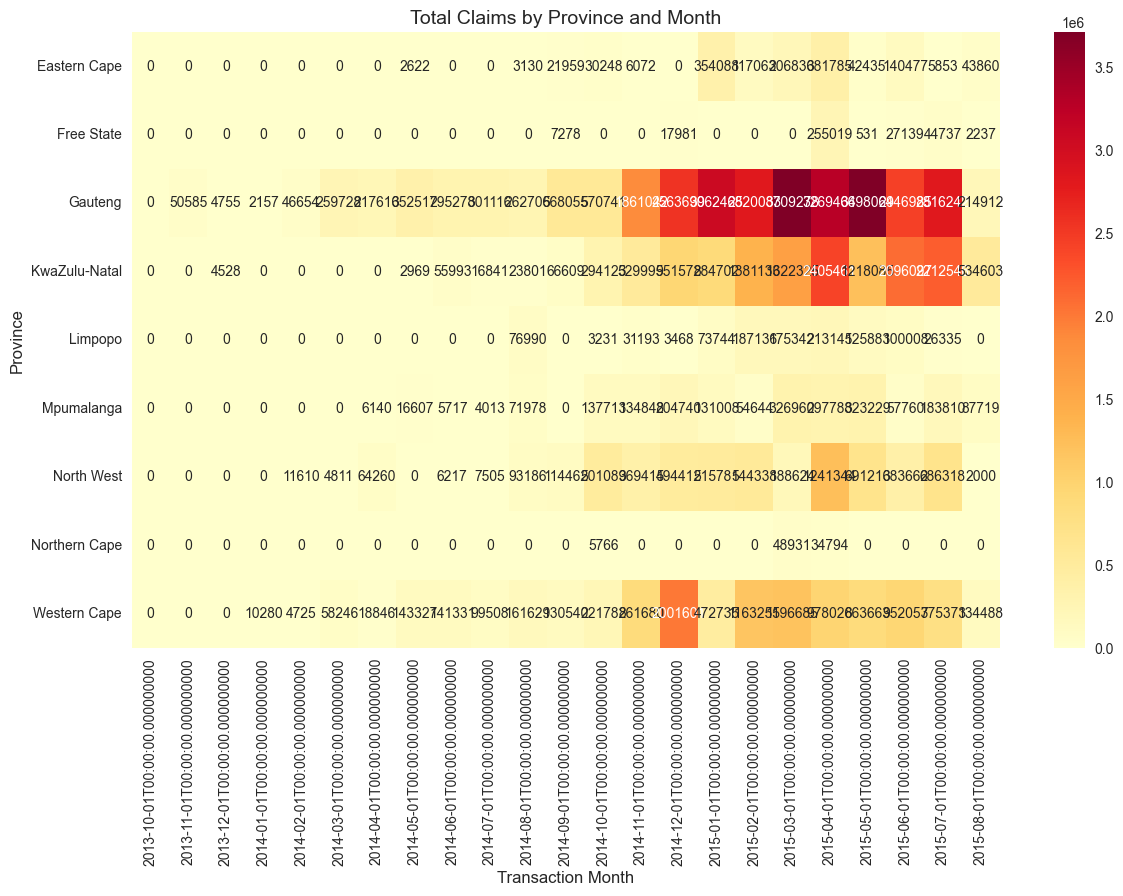

In [6]:
try:
    # Generate and display visualizations
    plot_eda_visualizations(df)
except NameError:
    print("DataFrame 'df' not defined. Please ensure data loading succeeded.")
except Exception as e:
    print(f"Error generating visualizations: {str(e)}")